https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [102]:
df = pd.read_csv('/content/Electric_Production.csv',parse_dates=['DATE'],index_col= 'DATE')
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [118]:
df.isna().sum()

Consumption    0
dtype: int64

In [121]:
from sklearn.preprocessing import MinMaxScaler
mnc = MinMaxScaler()
mnc_df = mnc.fit_transform(df)
mnc_df.shape

(397, 1)

In [122]:
train = mnc_df[:int(len(mnc_df) * 0.80)]
test = mnc_df[int(len(mnc_df) * 0.80):]
train.shape,test.shape


((317, 1), (80, 1))

In [126]:
def feature_selection(n_steps,data):
  x = []
  y = []
  for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)


In [127]:
n_steps = 12
x_train, y_train = feature_selection(n_steps,train)
x_train.shape,y_train.shape

((305, 12), (305,))

In [128]:
x_test,y_test = feature_selection(n_steps,test)
x_test.shape,y_test.shape

((68, 12), (68,))

In [135]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(305, 12, 1)

In [253]:
from keras.layers import Dense,GRU
from keras.models import Sequential
model = Sequential()
model.add(GRU(100,activation='relu',input_shape = (n_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [254]:
history = model.fit(x_train,y_train,epochs=100,batch_size=12)

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 0.1465
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0170
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 7/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 8/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 9/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 10/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0112
Epoch 11/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 12/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 13/100
26/26 [=================

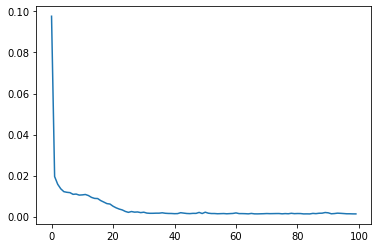

In [255]:
plt.plot(history.history['loss'])

In [256]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [259]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# test_predict.shape[0]+train_predict.shape[0]
# (train_predict)
# mnc.inverse_transform(mnc_df)

In [260]:
from sklearn.metrics import r2_score
train_predict = mnc.inverse_transform(train_predict)
trainY = mnc.inverse_transform(y_train.reshape(-1,1))
print(f'Train Dataset Score {r2_score(trainY,train_predict)}')

Train Dataset Score 0.963204320916738


In [261]:
test_predict = mnc.inverse_transform(test_predict)
testY = mnc.inverse_transform(y_test.reshape(-1,1))
print(f'Train Dataset Score {r2_score(testY,test_predict)}')

Train Dataset Score 0.8304041529172304


In [262]:
new_test_predict = np.empty_like(df)
new_test_predict[:,:]= np.nan
new_test_predict[len(train_predict):397 - 24] = test_predict
# new_test_predict

In [263]:
# # df.index[:len(train_predict)]
# train_predict_dataframe = pd.DataFrame({'DATE':df.index[:len(train_predict)],'consumed':mnc.fit_transform(train_predict).flatten()}).set_index('DATE')
# mnc.inverse_transform(train_predict)

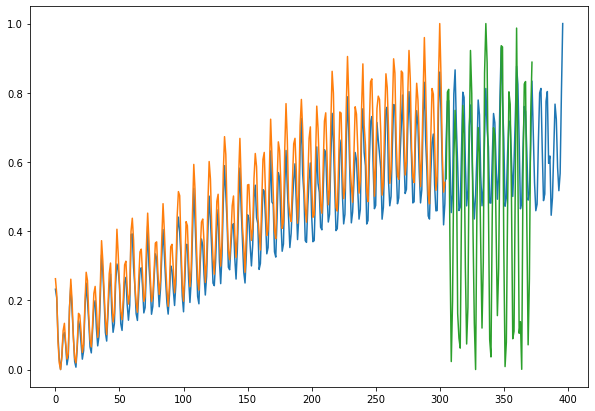

In [264]:
plt.figure(figsize = (10,7))
plt.plot((mnc_df))
# plt.plot(mnc.fit_transform(train_predict_dataframe))
plt.plot(mnc.fit_transform(train_predict))

plt.plot(mnc.fit_transform(new_test_predict))


In [231]:
# 